<a href="https://colab.research.google.com/github/jacmal/YELP_Reviews/blob/main/YELP_Reviews_Bayes_NLP_Classyfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRARIES IMPORT

In [ ]:
import requests
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix

#LOAD DATASET

In [ ]:
url="https://raw.githubusercontent.com/jacmal/YELP_Reviews/main/yelp.csv"
site = requests.get(url).content

df = pd.read_csv(io.StringIO(site.decode('utf-8')))
df.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


#DATA SET ANALYSIS

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
#first sample text reviews
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [ ]:
reviews_text = df['text']
reviews_text

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

In [ ]:
number_of_businesses_reviews = df['business_id'].value_counts()
number_of_businesses = len(number_of_businesses_reviews)

print("Businesses: ",number_of_businesses)
print("")
print(number_of_businesses_reviews)

Businesses:  4174

ntN85eu27C04nwyPa8IHtw    37
JokKtdXU7zXHcr20Lrk29A    37
hW0Ne_HTHEAgGF1rAdmR-g    34
WNy1uzcmm_UHmTyR--o5IA    32
VVeogjZya58oiTxK7qUjAQ    31
                          ..
17AQhJKGRA3YLeN0pB64cg     1
ArJEYF1XE5QbuVQVUGjv9g     1
Dj3i6a_vboALYTRKTmBABQ     1
ST0fLT0ZDqKNUxeY0unV8A     1
4pC4jMoanLySaOgGRwyXLQ     1
Name: business_id, Length: 4174, dtype: int64


In [ ]:
df['type'].value_counts()

review    10000
Name: type, dtype: int64

#VISUALIZE DATASET

In [ ]:
df['length'] = df['text'].apply(len)
df.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


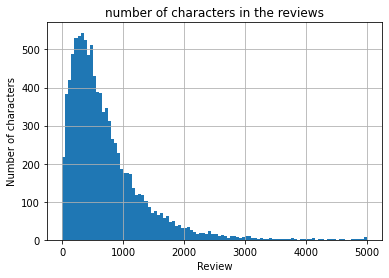

In [ ]:
df['length'].hist(bins=100)
plt.title('number of characters in the reviews')
plt.xlabel('Review')
plt.ylabel('Number of characters')
plt.show();

In [ ]:
df['length'].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

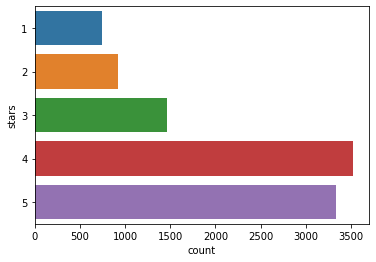

In [ ]:
sns.countplot(data=df, y='stars'); 

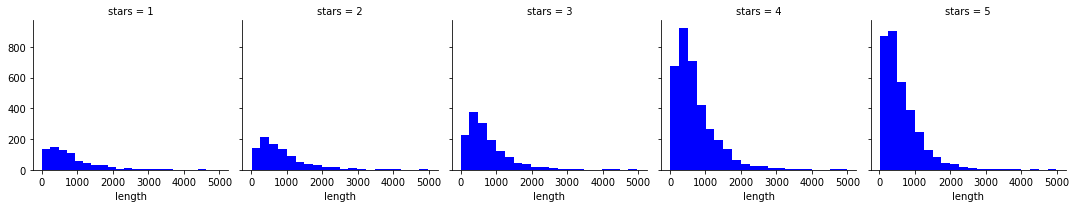

In [ ]:
grid = sns.FacetGrid(data=df, col='stars', col_wrap=5)
grid.map(plt.hist, 'length', bins=20, color='blue');

#TEXT PREPROCESSING

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def text_cleaner(text):
  '''
  Function take string variable and remove punctuation
  '''
  text_punc_removed = [char for char in text if char not in string.punctuation]
  text_punc_removed_join = ''.join(text_punc_removed)
  text_punc_removed_join_clean = [word for word in text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

  return text_punc_removed_join_clean

In [ ]:
#df['text_clean'] = df['text'].apply(text_cleaner)
#df['text_clean'][0]

In [ ]:
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

#TEXT COUNT VECTORIZATION

In [ ]:
df_1 = df[df['stars'] == 1]
df_5 = df[df['stars'] == 5]

In [ ]:
len(df_1)

749

In [ ]:
len(df_5)

3337

In [ ]:
df_1_5 = pd.concat([df_1, df_5])
df_1_5.shape

(4086, 11)

In [ ]:
#text count vectorizer

vectorizer = CountVectorizer(analyzer=text_cleaner)
text_countvectorizer = vectorizer.fit_transform(df_1_5['text'])

In [ ]:
type(text_countvectorizer)

scipy.sparse.csr.csr_matrix

In [ ]:
text_countvectorizer.shape

(4086, 26435)

In [ ]:
# ?
print(text_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#vectorizer.get_feature_names()

#

In [ ]:
df_1_5['stars'].values

array([1, 1, 1, ..., 5, 5, 5])

In [ ]:
#
classifer_NB = MultinomialNB()
label = df_1_5['stars'].values

In [ ]:
classifer_NB.fit(text_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
test_sample_1 = ['amazing food! highly recommended']
test_sample_2 = ['shit food, made me sick']

In [ ]:
testing_sample_countvectorizer = vectorizer.transform(test_sample_1)
classifer_NB.predict(testing_sample_countvectorizer)

array([5])

In [ ]:
testing_sample_countvectorizer = vectorizer.transform(test_sample_2)
classifer_NB.predict(testing_sample_countvectorizer)

array([1])

#CREATE TRAIN AND TEST SETS

In [ ]:
X = text_countvectorizer
y = label

In [ ]:
X.shape

(4086, 26435)

In [ ]:
y.shape

(4086,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_test_np_array = np.array(y_test)

In [ ]:
test_values = pd.DataFrame(data=y_test_np_array)

In [ ]:
test_values.value_counts()

5    669
1    149
dtype: int64

#MODEL EVALUATION

In [ ]:
classifer_NB_Ev = MultinomialNB()
classifer_NB_Ev.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = classifer_NB_Ev.predict(X_test)

In [ ]:
y_pred.shape

(818,)

In [ ]:
y_pred

array([5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 1, 5, 5,
       1, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 1, 5,
       5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 5, 1, 5, 5, 1, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5,
       5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5,
       5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 5,
       5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 5, 5, 1, 5, 1, 5, 5, 1, 5, 5, 1, 5,

#CLASSIFIER METRICS

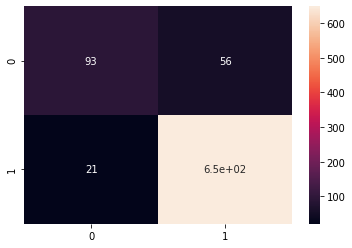

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.62      0.71       149
           5       0.92      0.97      0.94       669

    accuracy                           0.91       818
   macro avg       0.87      0.80      0.83       818
weighted avg       0.90      0.91      0.90       818



In [ ]:
#???
from sklearn.ensemble import GradientBoostingClassifier as XGB
classifer_XGB = XGB()
classifer_XGB.fit(X_train, y_train)
y_pred_xgb = classifer_XGB.predict(X_test)

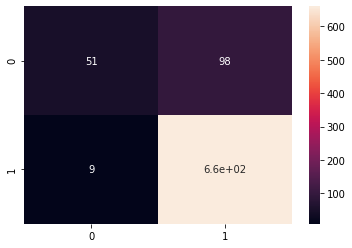

In [ ]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_2, annot=True);